# Import LIbrary

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master


In [2]:
import cv2
import matplotlib.pyplot as plt
from darkflow.net.build import TFNet
from pathlib import Path
plt.rcParams['figure.figsize']=[20,10]
import numpy as np
from google.colab.patches import cv2_imshow
import time
# from pytube import YouTube

# Download Test Video

In [0]:
video = YouTube('https://www.youtube.com/watch?v=BhyqekkRmvw&t=783s').streams.first()
video.download('/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/input')
video

<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2">

In [0]:
# target test clip
# start: 4.02
# end: 8.46
# fps: 30
start = 4*60*30+1*30
end = 8*60*30+46*30

In [0]:
cap = cv2.VideoCapture('/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images/input/Full Match   Brazil vs Argentina   2018 Fifa World Cup Qualifiers   11 10 2016   YouTube.mp4')

In [0]:
print(f'FPS: {cap.get(cv2.CAP_PROP_FPS)}\nCount: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}\
\nHeight: {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}\nWidth: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}')

FPS: 30.0
Count: 194853.0
Height: 720.0
Width: 1280.0


In [0]:
i=1
while(cap.isOpened()):
  (ret,frame) = cap.read()
  
  if (ret and i==start) or (ret and i==end):
      cv2_imshow(frame)
  if i==end:
    break
  i+=1
cap.release()

Output hidden; open in https://colab.research.google.com to view.

# Model Training Yolov2

In [0]:
%cd /content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/

/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master


In [0]:
option ={
    'model' : 'cfg/yolov2-voc-footballv2.cfg',
    'load' : 7125,
    'train' : True,
    'gpu' : 1.0,
    'annotation' :  'new_model_data/annotations',
    'dataset' : 'new_model_data/images/Part1_Gray',
    'epoch' : 10
}

tfnet = TFNet(option)
tfnet.train()

Parsing cfg/yolov2-voc-footballv2.cfg
Loading None ...
Finished in 0.00013017654418945312s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leak

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-00823ed28953>", line 12, in <module>
    tfnet.train()
  File "/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/darkflow/net/flow.py", line 56, in train
    fetched = self.sess.run(fetches, feed_dict)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 950, in run
    run_metadata_ptr)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1173, in _run
    feed_dict_tensor, options, run_metadata)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1350, in _do_run
    run_metadata)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1356, in _do_call
    return fn(*args)
  File "/usr/local/lib/py

KeyboardInterrupt: ignored

# Prediction

In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/

/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master


In [4]:
option ={
    'model' : './cfg/yolov2-voc-footballv2.cfg',
    'load' : -1,
    'thershold' : 0.4,
    'gpu' : 1.0
}
tfnet = TFNet(option)

Parsing ./cfg/yolov2-voc-footballv2.cfg
Loading None ...
Finished in 0.00012421607971191406s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  le

In [0]:
def channel3GRAY(array):
  gray = cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)
  img2=np.ones(shape=array.shape)
  img2[:,:,0] = gray
  img2[:,:,1] = gray
  img2[:,:,2] = gray
  return(img2)

In [0]:
def content_page(img,start_y,difference,word_list):
  for i in range(len(word_list)):
    cv2.putText(img,word_list[i],(30,start_y+i*difference),cv2.FONT_HERSHEY_COMPLEX,1,(255, 255, 255),1,cv2.LINE_AA)

In [0]:
%cd /content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images

/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images


In [0]:
label_color_dict = {'Player':(255,0,0),
                   'Referee':(0,0,255),
                   'Football':(255,255,255),
                   'Goalpost':(0,0,0),
                   'Holding the ball':(0,255,0)}
word_list=['Blue: Player','Red: Referee','White: Football','Black: Goalpost','Green: Holding the ball']
cap = cv2.VideoCapture('/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images/input/Full Match   Brazil vs Argentina   2018 Fifa World Cup Qualifiers   11 10 2016   YouTube.mp4')

In [0]:
# output to mp4
output_movie = cv2.VideoWriter('0001no_team.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (1280,720))

In [0]:
i=1
j=1
while(cap.isOpened()):
  (ret,color_img) = cap.read()
  if ((i >= start) and (i <= end) and ret):
    start_time = time.time()
    gray_img  = channel3GRAY(color_img)
    result=tfnet.return_predict(gray_img)
    
    # visualization
    for info in result:
      pt1=(info['bottomright']['x'],info['bottomright']['y'])
      pt2=(info['topleft']['x'],info['topleft']['y'])  
      cv2.rectangle(color_img,pt1,pt2,label_color_dict[info['label']],2)
      cv2.putText(color_img,str(info['confidence']*100)[0:4]+'%',pt2,cv2.FONT_HERSHEY_COMPLEX,1,label_color_dict[info['label']],2,cv2.LINE_AA)
    content_page(color_img,32,40,word_list)
    output_movie.write(color_img)
    print(f'FPS: {str(1/(time.time()-start_time))[:5]} {j}/{end-start+1}') 
    j+=1
  if (i > end):
    break
  i+=1

cap.release()

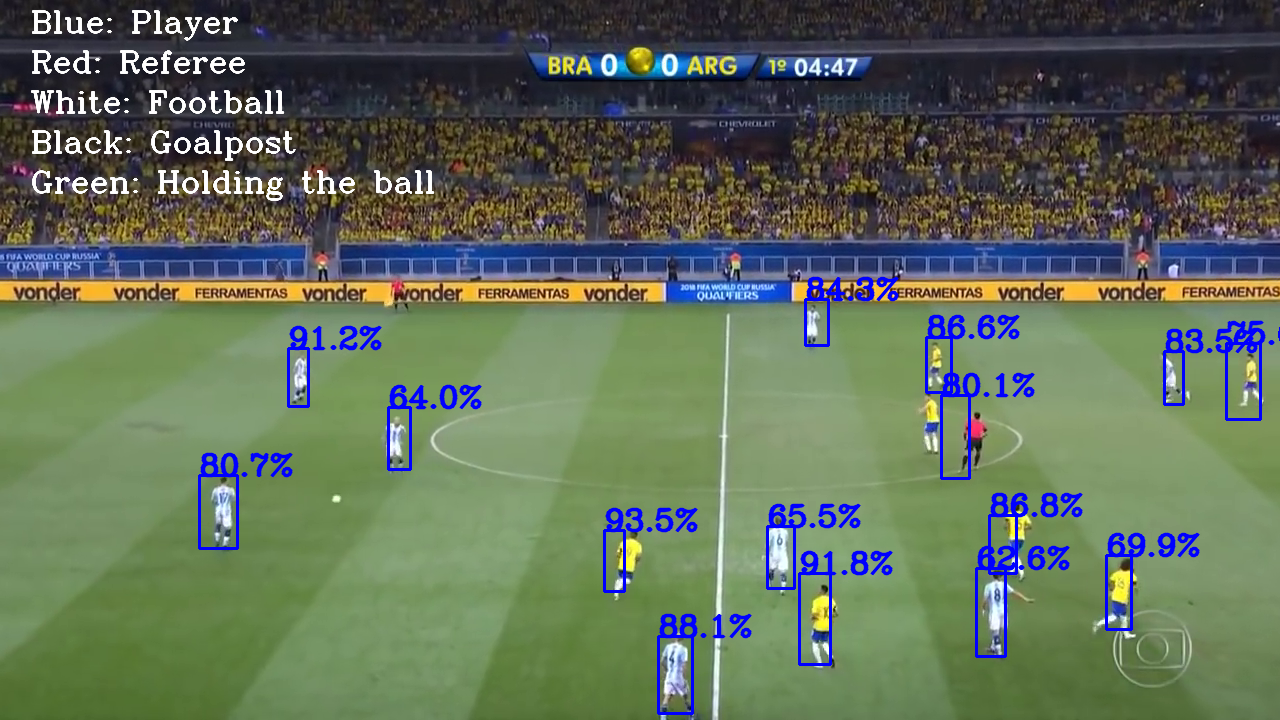

In [0]:
cv2_imshow(color_img)

# Color detection

In [0]:
def color_detect(img,info,color_list,color_dict):
      threshold=[]
      for color_name in color_list:
        threshold.append(color(img,info,color_name,color_dict))
#         print(Color,': ',color(img,info,Color,color_dict[Color]['high'],color_dict[Color]['low']))
      index=threshold.index(max(threshold))
     
      return color_list[index]


In [0]:
# output white area amount
def color(img,info,color_name,color_dict):
  person=cut_person(img,info)
  hsv = cv2.cvtColor(person, cv2.COLOR_BGR2HSV)
  mask =cv2.inRange(hsv,np.array(color_dict[color_name]['low']),np.array(color_dict[color_name]['high']))
  cv2_imshow(person)
  cv2_imshow(mask)
  return sum(mask.flatten())

In [0]:
# latest function
# What is the value?
def high_and_low(target,high='?',low='?'):
  hsv_range=cv2.cvtColor(target, cv2.COLOR_BGR2HSV).reshape(int(len(target.flatten())/3),1,3)
  h_list=[]
  s_list=[]
  v_list=[]

  for hsv in hsv_range:
    [[h,s,v]] =hsv
    h_list.append(h)
    s_list.append(s)
    v_list.append(v)


  try: 
    print('Old range of color: ',(high,low))
    if high[0]<max(h_list):
      high[0]=max(h_list)
    if high[1]<max(s_list):
      high[1]=max(s_list)
    if high[2]<max(v_list):
      high[2]=max(v_list)
    if low[0]>min(h_list):
      low[0]=min(h_list)
    if low[1]>min(s_list):
      low[1]=min(s_list)
    if low[2]>min(v_list):
      low[2]=min(v_list)
    print('Renew range of color: ',(high,low))
  except:
    high=(max(h_list),max(s_list),max(v_list))
    low=(min(h_list),min(s_list),min(v_list))
    print('New range of color: ',(high,low))
  color_dict[color_name]['high']=high
  color_dict[color_name]['low']=low
  return (high,low)

In [0]:
def cut_person(img,info):
  col2=info['bottomright']['x']
  row2=info['bottomright']['y']
  col1=info['topleft']['x']
  row1=info['topleft']['y']
  person= img[row1:row2,col1:col2]
  return person

# Create Range of color

In [11]:
%cd '/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images'

/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images


Old range of color:  ('?', '?')
New range of color:  ((32, 255, 255), (30, 112, 254))


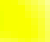

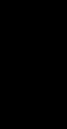

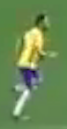

Old range of color:  ((32, 255, 255), (30, 112, 254))
New range of color:  ((31, 199, 255), (24, 105, 187))


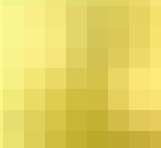

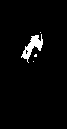

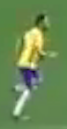

Old range of color:  ('?', '?')
New range of color:  ((153, 164, 72), (146, 85, 42))


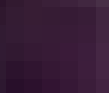

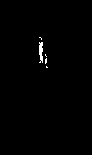

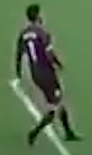

Old range of color:  ('?', '?')
New range of color:  ((175, 255, 255), (168, 255, 248))


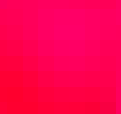

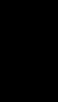

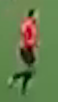

Old range of color:  ('?', '?')
New range of color:  ((110, 32, 255), (90, 14, 235))


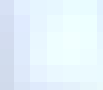

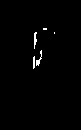

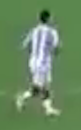

Old range of color:  ('?', '?')
New range of color:  ((81, 255, 200), (76, 167, 116))


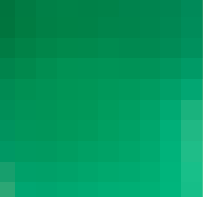

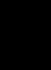

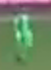

Old range of color:  ((81, 255, 200), (76, 167, 116))
New range of color:  ((79, 255, 204), (74, 167, 136))


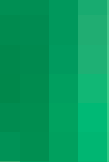

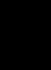

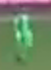

Old range of color:  ((79, 255, 204), (74, 167, 136))
New range of color:  ((79, 255, 188), (74, 161, 136))


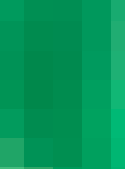

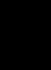

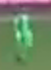

Old range of color:  ((79, 255, 188), (74, 161, 136))
New range of color:  ((79, 255, 224), (73, 137, 136))


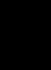

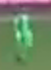

Old range of color:  ((79, 255, 224), (73, 137, 136))
New range of color:  ((79, 255, 224), (73, 133, 131))


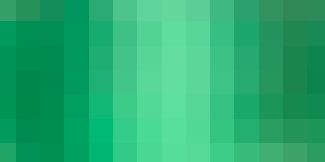

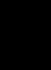

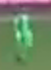

In [12]:
color_dict={
            'yellow':{'low':'?',
                      'high':'?'},
    
           'black':{'low':'?',
                      'high':'?'},
    
           'red':{'low':'?',
                  'high':'?'},
    
           'white':{'low':'?',
                        'high':'?'},
            
            'green':{'low':'?',
                    'high':'?'}
    
            }

# each color
for color_name in ['yellow','black','red','white','green']:
  person = cv2.imread(f'./person/{color_name}_person.png')
  hsv = cv2.cvtColor(person, cv2.COLOR_BGR2HSV)
  color_list = [cv2.imread(str(path)) for path in sorted(Path(f'clothes_color/{color_name}').glob('*.png'))]
  for Color in color_list:
    high,low = high_and_low(Color,color_dict[color_name]['high'],color_dict[color_name]['low'])
    cv2_imshow(Color)
    mask =cv2.inRange(hsv,np.array(low),np.array(high))
    cv2_imshow(mask)
    cv2_imshow(person)

# Prediction + Color Detection

In [0]:
color_name_list=['yellow','red','green','white','black']

In [0]:
word_list=['Blue: Argentina',
           'Black: Keeper(Argentina)',
           'Yellow: Brazil',
           'Green: Keeper(Brazil)',
            'Red: Referee',
            'Sliver: Football\Goalpost\Holding the ball']
label_dict={
            'yellow':(0,255,255),
    
           'black':(0,0,0),
    
           'red':(0,0,255),
    
           'white':(255,255,255),
            
            'green':(0,255,0)
    
            }

In [0]:
img_list=[img for img in sorted(Path('/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images/person').glob('sample*.png'))[:1]]

In [18]:
for img in img_list:
  color_img = cv2.imread(str(img))
  gray_img = channel3GRAY(color_img)
  result = tfnet.return_predict(gray_img)
  for info in result[0:1]:
    print(color_detect(color_img,info,color_name_list,color_dict))

red


In [0]:
# target test clip
# start: 4.02
# end: 8.46
# fps: 30
start = 4*60*30+1*30
end = 8*60*30+46*30


In [0]:
cap = cv2.VideoCapture('/content/gdrive/My Drive/Colab Notebooks/YOLO/Yolo(Darkflow)/darkflow-master/new_model_data/images/input/Full Match   Brazil vs Argentina   2018 Fifa World Cup Qualifiers   11 10 2016   YouTube.mp4')

In [0]:
# output to avi
output_movie = cv2.VideoWriter('0001_team.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (1280,720))

In [0]:
j=1
i=1
while(cap.isOpened()):
  (ret,color_img) = cap.read()
  if (i >= start and i <= end and ret):
    start_time = time.time()
    gray_img  = channel3GRAY(color_img)
    result=tfnet.return_predict(gray_img)
    # visualization
    for info in result:
      pt1=(info['bottomright']['x'],info['bottomright']['y'])
      pt2=(info['topleft']['x'],info['topleft']['y']) 
      # rectangle color
      try:
        color_name=color_detect(color_img,info,color_name_list,color_dict)
        if info['label'] not in ['Player','Referee']:
#           print('Not Player,Referee')
          cv2.rectangle(color_img,pt1,pt2,(184,193,194),2)
          cv2.putText(color_img,str(info['confidence']*100)[0:4]+'%',pt2,cv2.FONT_HERSHEY_COMPLEX,1,(184,193,194),2,cv2.LINE_AA) 
        else:
#           print('Player,Referee')
          cv2.rectangle(color_img,pt1,pt2,label_dict[color_name],2)
          cv2.putText(color_img,str(info['confidence']*100)[0:4]+'%',pt2,cv2.FONT_HERSHEY_COMPLEX,1,label_dict[color_name],2,cv2.LINE_AA)
      except:
          pass

    content_page(color_img,32,40,word_list)
    output_movie.write(color_img)
    print(f'FPS: {str(1/(time.time()-start_time))[:5]} {j}/{end-start+1}') 
    j+=1
  if i>end:
    cap.release()
    break
  i+=1